<a href="https://colab.research.google.com/github/PrusTalbot/PrusTalbot/blob/main/%D0%9F%D0%A0%D0%95%D0%9E%D0%91%D0%A0%D0%90%D0%97%D0%9E%D0%92%D0%90%D0%9D%D0%98%D0%95%20%D0%94%D0%90%D0%9D%D0%9D%D0%AB%D0%A5%3A%20Replot%20(%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9%20%D0%B3%D1%80%D0%B0%D1%84%D0%B8%D0%BA)%2C%D0%9A%D0%BE%D1%80%D0%B5%D0%BB%D0%BB%D1%8F%D1%86%D0%B8%D1%8F%20%D0%9F%D0%B8%D1%80%D1%81%D0%BE%D0%BD%D0%B0%2CGet_dummies%20(p%D0%B0%D0%BC%D0%B5%D0%BD%D0%B0%20%D0%BA%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D1%85%20%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D0%B2%20%D0%BD%D0%B0%20%D1%87%D0%B8%D1%81%D0%BB%D0%BE%D0%B2%D1%8B%D0%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ПРЕОБРАЗОВАНИЕ ДАННЫХ**


1.   Replot (реляционный график)
2.   Корелляция Пирсона
3.   Get_dummies (pамена категориальных признаков на числовые)



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import io
from google.colab import files
uploaded=files.upload()

Saving Lesson_1_insurance.csv to Lesson_1_insurance (1).csv


**Relplot** - для рисования реляционных графиков

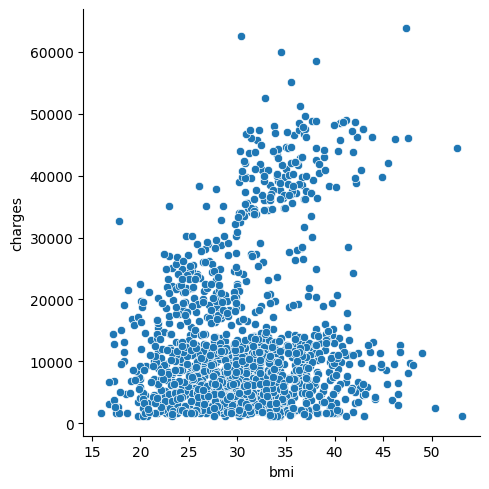

In [ ]:
df=pd.read_csv(io.BytesIO(uploaded['Lesson_1_insurance (1).csv']))
sns.relplot(data=df, x='bmi', y='charges')

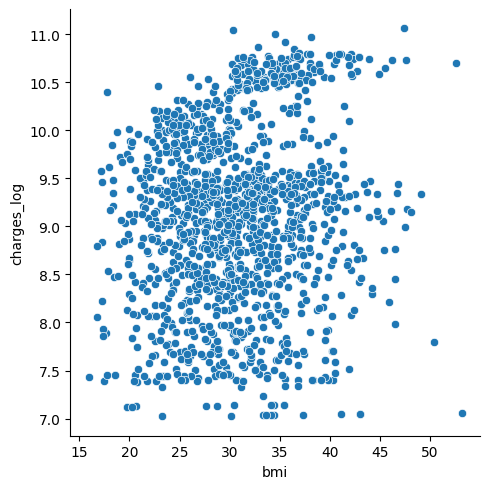

In [ ]:
df['charges_log']=df.charges.apply(np.log)
sns.relplot(data=df, x='bmi', y='charges_log')

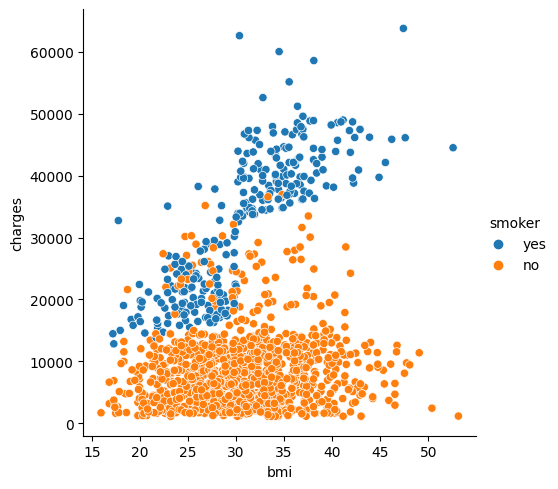

In [ ]:
sns.relplot(data=df, x='bmi', y='charges', hue='smoker')  # В РАЗРЕЗЕ ПО КУРИЛЬЩИКАМ

Корелляция Пирсона

In [ ]:
df.corr() # КОРЕЛЛЯЦИЯ ПИРСОНА (ПО УМОЛЧАНИЮ) ВСЕГО ДАТАФРЕЙМА

<ipython-input-13-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges,charges_log
age,1.000000,0.110333,0.059094,0.296249,0.523859
bmi,0.110333,1.000000,-0.010929,0.196689,0.128837
children,0.059094,-0.010929,1.000000,0.027631,0.088474
charges,0.296249,0.196689,0.027631,1.000000,0.892266
charges_log,0.523859,0.128837,0.088474,0.892266,1.000000


In [ ]:
display(df)

,age,sex,bmi,children,smoker,region,charges
0,37.0,male,34.200,1.0,yes,northeast,39047.28500
1,35.0,female,43.340,2.0,no,southeast,5846.91760
2,62.0,male,NaN,50.0,NaN,southeast,NaN
3,53.0,female,26.700,2.0,no,southwest,11150.78000
4,59.0,female,27.830,3.0,no,southeast,14001.28670
...,...,...,...,...,...,...,...
1458,31.0,female,21.755,0.0,no,northwest,4134.08245
1459,56.0,male,33.630,0.0,yes,northwest,43921.18370
1460,34.0,female,26.410,1.0,no,northwest,5385.33790
1461,54.0,female,31.240,0.0,no,southeast,10338.93160


**ЗАМЕНА КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ НА ЧИСЛОВЫЕ**

Метод get_dummies

In [ ]:
# СОЗДАЕМ УСЛОВИЕ ДЛЯ ЗАМЕНЫ ПО 'sex' - 'male' СТАНЕТ 0, 'female' СТАНЕТ 1, 'Unknown' СТАНЕТ -1)
sex_to_repalce={'male':0, 'female':1, 'Unknown':-1}

# СОЗДАЕМ УСЛОВИЕ ДЛЯ ЗАМЕНЫ ПО 'smoker' - 'yes' СТАНЕТ 1, 'no' СТАНЕТ 0, 'Unknown' СТАНЕТ -1
smoker_to_replace={'yes':1, 'no':0, 'Unknown':-1}

df['sex']=df['sex'].replace(sex_to_repalce)             # ЗАМЕНЯЕМ МЕТОДОМ replace
df['smoker']=df['smoker'].replace(smoker_to_replace)

In [ ]:
display(df)

,age,sex,bmi,children,smoker,region,charges
0,37.0,0.0,34.200,1.0,1.0,northeast,39047.28500
1,35.0,1.0,43.340,2.0,0.0,southeast,5846.91760
2,62.0,0.0,NaN,50.0,NaN,southeast,NaN
3,53.0,1.0,26.700,2.0,0.0,southwest,11150.78000
4,59.0,1.0,27.830,3.0,0.0,southeast,14001.28670
...,...,...,...,...,...,...,...
1458,31.0,1.0,21.755,0.0,0.0,northwest,4134.08245
1459,56.0,0.0,33.630,0.0,1.0,northwest,43921.18370
1460,34.0,1.0,26.410,1.0,0.0,northwest,5385.33790
1461,54.0,1.0,31.240,0.0,0.0,southeast,10338.93160


In [ ]:
# метод get_dummies создает набор переменных и присваивает значение 0 или 1. Переменные - набор значений в столбце
pd.get_dummies(df.region)

,northeast,northwest,southeast,southwest
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0
...,...,...,...,...
1458,0,1,0,0
1459,0,1,0,0
1460,0,1,0,0
1461,0,0,1,0


In [ ]:
region_cat=pd.get_dummies(df.region)     # СОЗДАЛИ ПЕРЕМЕННУЮ С НАБОРОМ ЗНАЧЕНИЙ, КОТОРЫЙ ДАЛ МЕТОД get_dummies
df=pd.concat([df, region_cat], axis=1)   # МЕТОДОМ concat ОБЪЕДИНЯЕМ df С region_cat В ВИДЕ СТОЛЦА (axis=1)

df.drop('region', inplace=True, axis=1)  # МЕТОДОМ drop УДАЛЯЕМ СТОЛБЕЦ region И ВНОСИМ ИЗМЕНЕНИЯ В ДАТАФРЕЙМ inplace=True
display(df)

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,37.0,0.0,34.200,1.0,1.0,39047.28500,1,0,0,0
1,35.0,1.0,43.340,2.0,0.0,5846.91760,0,0,1,0
2,62.0,0.0,NaN,50.0,NaN,NaN,0,0,1,0
3,53.0,1.0,26.700,2.0,0.0,11150.78000,0,0,0,1
4,59.0,1.0,27.830,3.0,0.0,14001.28670,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1458,31.0,1.0,21.755,0.0,0.0,4134.08245,0,1,0,0
1459,56.0,0.0,33.630,0.0,1.0,43921.18370,0,1,0,0
1460,34.0,1.0,26.410,1.0,0.0,5385.33790,0,1,0,0
1461,54.0,1.0,31.240,0.0,0.0,10338.93160,0,0,1,0
